In [44]:
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import time
import json
from pandas.io.json import json_normalize

## Gather data
    1. Twitter Archive Enhanced
    2. Images Predictions
    3. Twitter API

#### 1. Twitter Archive Enhanced

In [45]:
# Import the twitter-archive-enhanced into a DataFrame
twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [46]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. Images Predictions

In [47]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
images_predictions = pd.read_csv(io.StringIO(r.text), sep='\t')

In [48]:
images_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3.  Twitter API

In [49]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [50]:
##CREATE THE JSON FILE FOR THE TWEET API RESPONSE

#array for failed tweets
if False:
    tweets_ids_failed = []

    # create file to store responses
    with open('tweet_json.txt', 'w') as the_file:

        #save current time
        start = time.time()

        #try to get a api response for each tweet in the twitter_archive_enhanced
        for tweet_id in twitter_archive_enhanced.tweet_id:
            try:
                 #make api query
                tweet = api.get_status(tweet_id, tweet_mode='extended')

                #make a list of variables of interest
                json_items = {"id_str", "retweet_count", "favorite_count"}

                #creat a new dict/json from response dict with only the variables of interest
                new_json_dict = {key:value for key,value in tweet._json.items() if key in json_items}

                #make a json string from the json/dict
                json_str = json.dumps(new_json_dict)

                #save a new line with the json string
                the_file.write(json_str + "\n")

                #helper methods that avoind querying the api too fast
                print(tweet_id)
                print(time.time() - start)

            except:
                #catch any id with no info
                tweets_ids_failed.append(tweet_id)


In [51]:
##READ THE JSON TO CREATE A DF WITH THE TWEETER API DATA 

#Read each line of the file and save each one on a list of strings
with open('tweet_json.txt') as json_file:
    lines = json_file.readlines()
    
#remove /n from each line
lines = [x.strip() for x in lines]

#change each str line into a dict
lines = [json.loads(x) for x in lines]

#create a df from a dict list
twitter_api = pd.DataFrame(lines)

In [52]:
twitter_api.head()

,favorite_count,id_str,retweet_count
0,39152,892420643555336193,8704
1,33526,892177421306343426,6389
2,25264,891815181378084864,4245
3,42499,891689557279858688,8802
4,40663,891327558926688256,9586


# Assess data

In [53]:
##CREATE COPYS OF THE DF TO AVOID CHANGING THE ORIGINAL DATA
twitter_archive_clean = twitter_archive_enhanced.copy()
images_predictions_clean = images_predictions.copy()
twitter_api_clean = twitter_api.copy()

In [54]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1654,683449695444799489,NaN,NaN,2016-01-03 00:47:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I just want to be friends with this dog. Appears to be into the sports. A true brobean. 10/10 would introduce to mom https://t.co/1Z7Q6svWpe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683449695444799489/photo/1,10,10,None,None,None,None,None
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He just wanted to say hi. 9/10 very personable pup https://t.co/Sk3CbhmKSW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711652651650457602/photo/1,9,10,Gary,None,None,None,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere https://t.co/bvkkqOjNDV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825502875648/photo/1,12,10,None,doggo,None,None,None
1014,747204161125646336,NaN,NaN,2016-06-26 23:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clark. He's deadly af. Clearly part shark (see pic 2). 10/10 would totally still try to pet https://t.co/dmdEBOEctC,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747204161125646336/photo/1,https://twitter.com/dog_rates/status/747204161125646336/photo/1",10,10,Clark,None,None,None,None
1977,672988786805112832,NaN,NaN,2015-12-05 04:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Schnozz. He's had a blurred tail since birth. Hasn't let that stop him. 10/10 inspirational pupper https://t.co/a3zYMcvbXG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672988786805112832/photo/1,10,10,Schnozz,None,None,pupper,None
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,doggo,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stanley. He likes road trips. Will shift for you. One ear more effective than other. 13/10 we don't leave until you buckle pup Stanley https://t.co/vmCu3PFCQq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957897576449/photo/1,13,10,Stanley,None,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's your Lyft for tonight. Kindly requests you buckle pup and remain reasonably calm during the ride. 13/10 he must focus https://t.co/AqPTHYUBFz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345708580865/photo/1,13,10,Alfie,None,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 ht

In [55]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [57]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [58]:
twitter_archive_clean.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [59]:
twitter_archive_clean["in_reply_to_status_id"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2326   NaN
2327   NaN
2328   NaN
2329   NaN
2330   NaN
2331   NaN
2332   NaN
2333   NaN
2334   NaN
2335   NaN
2336   NaN
2337   NaN
2338   NaN
2339   NaN
2340   NaN
2341   NaN
2342   NaN
2343   NaN
2344   NaN
2345   NaN
2346   NaN
2347   NaN
2348   NaN
2349   NaN
2350   NaN
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: in_reply_to_status_id, Length: 2356, dtype: float64

In [60]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [61]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_clean[["text", "rating_numerator", "rating_denominator"]].sample(50)

,text,rating_numerator,rating_denominator
1132,"When you're way too slow for the ""down low"" portion of a high five. 13/10 https://t.co/Cofwoy7Vpq",13,10
20,This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX,12,10
1426,This is Carter. He wakes up in the morning and pisses excellence. 10/10 best there is plain and simple https://t.co/pHktDjpFr8,10,10
814,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7,10
1549,This is Ferg. He swallowed a chainsaw. 1 like = 1 prayer 10/10 remain calm Ferg (vid by @calebturer) https://t.co/gOH51Y8Yh1,10,10
218,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIENCED MANY THINGS. PROBABLY LOST OTHER EAR DOING SOMETHING HEROIC. 13/10 HUG THE DOG HOPPUS,13,10
1075,Here's a doggo that don't need no human. 12/10 independent af (vid by @MichelleLiuCee) https://t.co/vdgtdb6rON,12,10
1492,This pupper just descended from heaven. 12/10 can probably fly https://t.co/X6X9wM7NuS,12,10
854,This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 https://t.co/eSvz4EapHH,10,10
367,This is Alfie. He's your Lyft for tonight. Kindly requests you buckle pup and remain reasonably calm during the ride. 13/10 he must focus https://t.co/AqPTHYUBFz,13,10


In [62]:
twitter_archive_clean[["text", "name", "doggo", "floofer", "puppo", "rating_numerator", "rating_denominator"]].sample(50)

,text,name,doggo,floofer,puppo,rating_numerator,rating_denominator
245,We usually don't rate polar bears but this one seems extra good. Majestic as h*ck. 13/10 would hug for a while https://t.co/TLNexlqzXP,None,None,None,None,13,10
601,RT @dog_rates: This is Lola. She fell asleep on a piece of pizza. 10/10 frighteningly relatable https://t.co/eqmkr2gmPH,Lola,None,None,None,10,10
907,This is Leonard. He hides in bushes to escape his problems. 10/10 relatable af https://t.co/TdyGTcX0uo,Leonard,None,None,None,10,10
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,None,None,None,14,10
1172,This is Ralphé. He patrols the lake. Looking for babes. 11/10 https://t.co/Pb6iMmo0wk,Ralphé,None,None,None,11,10
2010,10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,None,None,None,None,10,10
2041,"This is JD (stands for ""just dog""). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF",JD,None,None,None,10,10
1994,This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,a,None,None,None,11,10
1194,This is Skittle. He's trying to communicate. 11/10 solid effort https://t.co/6WTfJvtKx6,Skittle,None,None,None,11,10
1828,All this pupper wanted to do was go skiing. No one told him about the El Niño. Poor pupper. 10/10 maybe next year https://t.co/fTgbq1UBR9,None,None,None,None,10,10


In [63]:
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [64]:
images_predictions_clean.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392,True,soft-coated_wheaten_terrier,0.028605,True,miniature_schnauzer,0.017805,True
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,0.127220,False
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True


In [65]:
images_predictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [66]:
images_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
print(len(images_predictions_clean))
print(len(twitter_archive_clean))

2075
2356


In [68]:
print(images_predictions_clean.tweet_id.sort_values().iloc[10:20])
print(twitter_archive_clean.tweet_id.sort_values().iloc[10:20])

10    666063827256086533
11    666071193221509120
12    666073100786774016
13    666082916733198337
14    666094000022159362
15    666099513787052032
16    666102155909144576
17    666104133288665088
18    666268910803644416
19    666273097616637952
Name: tweet_id, dtype: int64
2345    666063827256086533
2344    666071193221509120
2343    666073100786774016
2342    666082916733198337
2341    666094000022159362
2340    666099513787052032
2339    666102155909144576
2338    666104133288665088
2337    666268910803644416
2336    666273097616637952
Name: tweet_id, dtype: int64


In [69]:
twitter_api_clean.describe()

,favorite_count,retweet_count
count,2347.000000,2347.000000
mean,8116.128249,3066.140179
std,12200.553579,5091.986679
min,0.000000,0.000000
25%,1409.500000,612.000000
50%,3569.000000,1434.000000
75%,10056.000000,3570.500000
max,144022.000000,78252.000000


In [70]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
favorite_count    2347 non-null int64
id_str            2347 non-null object
retweet_count     2347 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.1+ KB


In [71]:
twitter_api_clean.sample(10)

,favorite_count,id_str,retweet_count
260,0,841833993020538882,17119
1474,2416,693262851218264065,561
1651,2142,683078886620553216,624
1243,2742,710844581445812225,763
37,78266,884925521741709313,18892
2131,346,670003130994700288,99
827,5225,767884188863397888,1595
1180,2076,718246886998687744,558
601,16019,797545162159308800,5541
1865,1370,675135153782571009,534


In [72]:
twitter_api_clean.duplicated().value_counts()

False    2347
dtype: int64

### Issues: 

#### Quality
1. `twitter_archive`: contains retweets, which we don't need
2. `twitter_archive`: contains columns related to retweets which we don't need
3. `twitter_archive`: source has 4 values, however it has a complete < a > tag with href and name
4. `twitter_archive`: incorrect ratings
5. `twitter_archive`: incorrect dog_names
6. `twitter_archive`: tweets without raking are not dogs
7. `twitter_archive`: incorrect dog_stages
8. `images_predictions`: p1, p2 and p3 do not have consistent lower or uppercase

#### Tidiness
1. `twitter_archive` text has the tweet and the url
2. `twitter_api` columns should be merged into `twitter_archive`

## Clean data

### Quality #1

#### Define

`twitter_archive`: contains retweets, wich we don't need

#### Code

In [73]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [74]:
print(len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notna()]))

0


### Quality #2

#### Define

`twitter_archive`: contains columns related to retweets which we don't need


#### Code

In [75]:
drop_columns = [
                'in_reply_to_status_id',
                'in_reply_to_user_id',
                'retweeted_status_id',
                'retweeted_status_user_id',
                'retweeted_status_timestamp'
                ]
twitter_archive_clean.drop(columns=drop_columns, inplace=True)

#### Test

In [76]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Quality #3

#### Define

`twitter_archive`: source has 4 values, however it has a complete < a > tag with href and name

#### Code

In [77]:
def clean_source(x):
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        x = 'Twitter for iPhone'
    elif x == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        x = 'Vine'
    elif x == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        x = 'Twitter Web Client'
    elif x == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        x = 'TweetDeck'
    return x

In [78]:
twitter_archive_clean['source'] = twitter_archive_clean.source.apply(clean_source)

#### Test

In [79]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2042
Vine                  91  
Twitter Web Client    31  
TweetDeck             11  
Name: source, dtype: int64

### Quality #4

#### Define

`twitter_archive`: incorrect ratings

#### Code

In [167]:
import math

# set ratings patter to capture ratings
ratings_pattern = '( |\.)(\d{1,2}(\.\d{1,2})?)/(\d*0)'

# extract ratings
ratings = twitter_archive_clean.text.str.extract(ratings_pattern,expand = False)

twitter_archive_clean['rating_numerator'] = ratings[1].astype('float')
twitter_archive_clean['rating_denominator'] = ratings[3].astype('float')

#### Test

In [175]:
twitter_archive_clean[['text','rating_numerator','rating_denominator']][twitter_archive_clean['rating_denominator'] != 10.0]
twitter_archive_clean[['text','name','rating_numerator','rating_denominator']].head(100)
print(twitter_archive_clean['rating_numerator'].value_counts())
print(twitter_archive_clean[['text','rating_numerator']][twitter_archive_clean['rating_numerator'] == 11.26])
print(twitter_archive_clean[['text','rating_numerator']][twitter_archive_clean['rating_numerator'] == 11.27])

12.00    493
10.00    429
11.00    422
13.00    301
9.00     154
8.00     97 
7.00     53 
14.00    44 
5.00     33 
6.00     32 
3.00     19 
4.00     17 
2.00     8  
1.00     7  
0.00     2  
50.00    1  
11.26    1  
9.75     1  
13.50    1  
17.00    1  
11.27    1  
44.00    1  
15.00    1  
88.00    1  
84.00    1  
9.50     1  
60.00    1  
80.00    1  
45.00    1  
99.00    1  
Name: rating_numerator, dtype: int64
                                                                                                            text  \
1712  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  
1712  11.26             
                                                                                                                                                                  text  \
763  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.

### Quality #5

#### Define

6. `twitter_archive`: incorrect dog_names

#### Code

In [44]:
name_pattern = '(This is |Meet |Say hello to |RIP |named )(([A-Z][a-z]+)( and [A-Z][a-z]+)?)'
names = twitter_archive_clean.text.str.extract(name_pattern,expand = False)
twitter_archive_clean.name = names[1]
names.sample

<bound method NDFrame.sample of              0         1         2    3
0     This is    Phineas   Phineas  NaN
1     This is      Tilly     Tilly  NaN
2     This is     Archie    Archie  NaN
3     This is      Darla     Darla  NaN
4     This is   Franklin  Franklin  NaN
5          NaN       NaN       NaN  NaN
6        Meet        Jax       Jax  NaN
7          NaN       NaN       NaN  NaN
8     This is       Zoey      Zoey  NaN
9     This is     Cassie    Cassie  NaN
10    This is       Koda      Koda  NaN
11    This is      Bruno     Bruno  NaN
12         NaN       NaN       NaN  NaN
13    This is        Ted       Ted  NaN
14    This is     Stuart    Stuart  NaN
15    This is     Oliver    Oliver  NaN
16    This is        Jim       Jim  NaN
17    This is       Zeke      Zeke  NaN
18    This is    Ralphus   Ralphus  NaN
20    This is     Gerald    Gerald  NaN
21    This is    Jeffrey   Jeffrey  NaN
22         NaN       NaN       NaN  NaN
23    This is     Canela    Canela  NaN
24      

#### Test

In [45]:
twitter_archive_clean[['name', 'text']].sample(100)

,name,text
2097,Jerry,This is Jerry. He's a great listener. Low main...
2172,NaN,Just got home from college. Dis my dog. She do...
1831,Herm,This is Herm. He just wants to be like the oth...
1379,Millie,Meet Millie. She's practicing her dive form fo...
1900,Rodman,This is Rodman. He's getting destroyed by the ...
2190,Jaycob,Meet Jaycob. He got scared of the vacuum. Hide...
407,Winston,This is Winston. The goggles make him a superh...
2010,NaN,10/10 for dog. 7/10 for cat. 12/10 for human. ...
1564,NaN,Please send dogs. I'm tired of seeing other st...
985,Boomer,This is Boomer. He's self-baptizing. Other dog...


### Quality #6

#### Define

9. `twitter_archive`: tweets without raking are not dogs

#### Code

In [46]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'].notna() & twitter_archive_clean['rating_numerator'].notna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Test

In [47]:
twitter_archive_clean['rating_denominator'].value_counts()

10     2157
50        3
80        2
20        2
170       1
150       1
110       1
40        1
90        1
70        1
120       1
130       1
Name: rating_denominator, dtype: int64

### Quality #7

#### Define

9. `twitter_archive`: incorrect dog stages

#### Code

In [48]:
dog_stage_pattern = '(puppo|doggo|pupper|floofer|floof)'

dog_stages = twitter_archive_clean.text.str.lower().str.extract(dog_stage_pattern,expand = False)

def normalize_stages(x):
    if x == "floof":
        return "floofer"
    return x
    
dog_stages = dog_stages.apply(normalize_stages)

twitter_archive_clean['dog_stage'] = dog_stages

drop_columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(columns=drop_columns, inplace=True)

#### Test

In [49]:
print(list(twitter_archive_clean))
twitter_archive_clean[['text','dog_stage']].sample(100)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage']


,text,dog_stage
116,"This is Rumble, but he's not ready to. Would r...",NaN
981,This is Finn. He's the most unphotogenic puppe...,pupper
1671,This is Kreg. He's riding an invisible jet ski...,NaN
929,This is Milo. He's currently plotting his reve...,NaN
625,This is Brody. He's trying to make the same fa...,NaN
1739,Say hello to William. He makes fun of others b...,NaN
168,Sorry for the lack of posts today. I came home...,puppo
1334,This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,pupper
2285,Quite an advanced dog here. Impressively dress...,NaN
1001,Pls don't send more sherks. I don't care how s...,floofer


### Quality #8

#### Define

`images_predictions`: p1, p2 and p3 do not have consistent lower or uppercase and even thus the most common separator for the prediction is a underscore, some use a hyphen as separator


#### Code

In [50]:
images_predictions_clean.p1 = images_predictions_clean.p1.str.lower()
images_predictions_clean.p2 = images_predictions_clean.p2.str.lower()
images_predictions_clean.p3 = images_predictions_clean.p3.str.lower()

def normalize_prediction(x):
    if "-" in x:
        return x.replace("-", "_")
    return x

images_predictions_clean.p1 = images_predictions_clean.p1.apply(normalize_prediction)
images_predictions_clean.p2 = images_predictions_clean.p2.apply(normalize_prediction)
images_predictions_clean.p3 = images_predictions_clean.p2.apply(normalize_prediction)

#### Test

In [51]:
print(images_predictions_clean.iloc[639])
images_predictions_clean.sample(100)

tweet_id                                 681297372102656000
jpg_url     https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg
img_num                                                   1
p1                                                    lhasa
p1_conf                                            0.482401
p1_dog                                                 True
p2                                                 shih_tzu
p2_conf                                            0.113672
p2_dog                                                 True
p3                                                 shih_tzu
p3_conf                                           0.0962286
p3_dog                                                 True
Name: 639, dtype: object


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,lakeland_terrier,0.275242,True,airedale,0.190569,True,airedale,0.102595,False
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,great_pyrenees,0.099278,True,great_pyrenees,0.032621,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,siberian_husky,0.033084,True,siberian_husky,0.016663,True
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,pembroke,0.778503,True,shetland_sheepdog,0.093834,True,shetland_sheepdog,0.060296,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,labrador_retriever,0.458746,True,great_dane,0.235504,True,great_dane,0.116864,True
1786,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,labrador_retriever,0.315163,True,golden_retriever,0.153210,True,golden_retriever,0.132791,True
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,saint_bernard,0.381377,True,leonberg,0.127998,True,leonberg,0.069357,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,pembroke,0.325638,True,golden_retriever,0.317235,True,golden_retriever,0.116087,True
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,chihuahua,0.718944,True,badger,0.178546,False,badger,0.037103,True
598,679722016581222400,https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg,1,boxer,0.459604,True,boston_bull,0.197913,True,boston_bull,0.087023,True


### Tidiness #1

#### Define

`twitter_archive` text has the tweet and the url

#### Code

In [53]:
splitter = 'https://'
twitter_archive_clean["tweet"], twitter_archive_clean["urls"] = twitter_archive_clean["text"].str.split(splitter, 1).str
twitter_archive_clean["urls"] = splitter + twitter_archive_clean["urls"]

#### Test

In [54]:
twitter_archive_clean[['tweet','urls']].sample(50)

,tweet,urls
1889,This is Superpup. His head isn't proportional ...,https://t.co/gxIFgg8ktm
1621,Meet Bruiser &amp; Charlie. They are the best ...,https://t.co/PEXHuvSVD4
2074,After so many requests... here you go.\n\nGood...,https://t.co/yfAAo1gdeY
2013,Exotic underwater dog here. Very shy. Wont ret...,https://t.co/WH7Nzc5IBA
1916,This is life-changing. 12/10,https://t.co/SroTpI6psB
623,This is Daisy. She's here to make your day bet...,https://t.co/PbgvuD0qIL
1574,Another magnificent photo. 12/10,https://t.co/X5w387K5jr
1985,This is Cheryl AKA Queen Pupper of the Skies. ...,https://t.co/i4XJEWwdsp
1500,This is Edgar. He's a Sassafras Puggleflash. N...,https://t.co/1NgMb9BTWB
1167,This is Panda. He's happy af. 11/10,https://t.co/IOAk9i4UvE


### Tidiness #2

#### Define

`twitter_api` columns should be merged into `twitter_archive`

#### Code

In [55]:
twitter_api_clean['id_str'] = pd.to_numeric(twitter_api_clean.id_str)
twitter_api_clean = twitter_api_clean.rename(columns={'id_str': 'tweet_id'})
twitter_archive_clean = twitter_archive_clean.merge(twitter_api_clean, on='tweet_id', how='left')

#### Test

In [56]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet,urls,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,39152,8704
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,33526,6389
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,25264,4245
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,42499,8802
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,40663,9586


## Saving the Dataframes to CSV

In [57]:
twitter_archive_clean.to_csv('weratedogs_tweets.csv')
images_predictions_clean.to_csv('weratedogs_image_predictions.csv')

## Visualizations

In [65]:
%pylab inline

import matplotlib.pyplot as plt

# Summarize the given data
def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

Populating the interactive namespace from numpy and matplotlib



retweet_count
Mean: 2740.8432183908044
Standard deviation: 4710.124719608821
Minimum: 0
Maximum: 78252


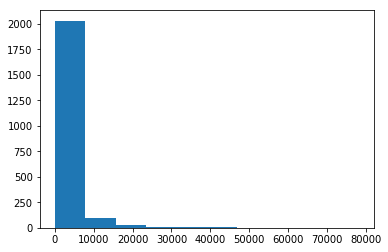

In [89]:
print("")
print("retweet_count")
describe_data(twitter_archive_clean.retweet_count)


favorite_count
Mean: 8757.95540229885
Standard deviation: 12447.304104751855
Minimum: 51
Maximum: 144022


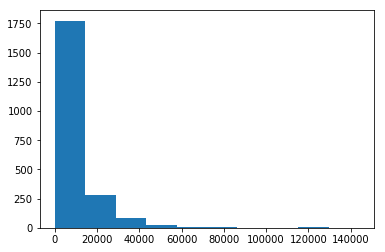

In [69]:
print("favorite_count")
describe_data(twitter_archive_clean.favorite_count)

Numerator
count    2172.000000
mean       12.779466
std        43.216238
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

 Value Counts
12      500
10      443
11      425
13      308
9       156
8        98
7        53
14       44
5        36
6        32
3        19
4        17
2         9
1         7
420       2
0         2
1776      1
44        1
121       1
99        1
75        1
45        1
27        1
17        1
15        1
26        1
50        1
666       1
60        1
80        1
84        1
88        1
144       1
182       1
204       1
143       1
165       1
Name: rating_numerator, dtype: int64

 Denominator
count    2172.000000
mean       10.497238
std         7.015906
min        10.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

 Value Counts
10     2157
50        3
80        2
20        2
1

Text(0,0.5,'denominator')

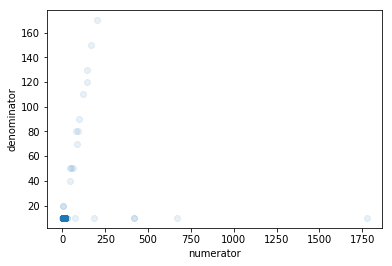

In [126]:
print("Numerator")
print(twitter_archive_clean.rating_numerator.describe())
print("\n Value Counts")
print(twitter_archive_clean.rating_numerator.value_counts())
print("\n Denominator")
print(twitter_archive_clean.rating_denominator.describe())
print("\n Value Counts")
print(twitter_archive_clean.rating_denominator.value_counts())


plt.scatter(twitter_archive_clean.rating_numerator, twitter_archive_clean.rating_denominator, alpha=0.1)
plt.xlabel("numerator")
plt.ylabel("denominator")


p1_conf when p1_dog = True
Mean: 0.6138232438642303
Standard deviation: 0.2596498372490585
Minimum: 0.0443334
Maximum: 0.999956


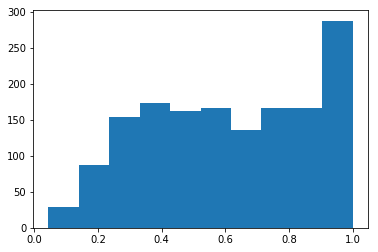

In [78]:
print("p1_conf when p1_dog = True")
describe_data(images_predictions_clean[images_predictions_clean['p1_dog'] == True].p1_conf)

## Insights

The data that was analyzed is from the WeRateDogs, I only included original tweets that have a rating, most of them are dogs, however some of the lower rankings were given when people sent other animals like dinosaurs. The database has 2175 tweets. Also I studied images predictions made by an algorithm which predicted if the images were of dogs and which breed they were.

Some of the insights made from the analysis of this data are:

- The average post of WeRateDogs with dog ranking gets about 2740 retweets, and one got up to 78252 retweet.

- WeRateDogs followers tend to favorite tweets more than they retweet, the mean of likes is 3.19 times the mean of retweets, however this does not apply to the maximum, because the maximum favorite count is of 144022

- Of the image predictions in which the first prediction is a dog has about 61% confidence, however there is at least one image that with only 4.43% certainty is predicted to be a dog. Also some images have a 99% confidence of being dogs.

-	Usually WeRateDogs rate base on a scale of 10, usually giving between 1 and 14, however there are some outliers, one even has 1776, those outliers should be checked because the might not be real values. Also, sometimes they rate on a scale of more than 10, but it is always on multiples of 10, this usually happens when a picture has more than one dog so they add 10 to the scale for each one of them